# Logistic Regression fill na values

In [1]:
from taxipred.utils.constants import LOG_REG_FILLED_NA
import pandas as pd 
df = pd.read_csv(LOG_REG_FILLED_NA)

df.head(5)

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Day_of_Week_Weekend,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,19.35,3.0,3.56,0.80,0.32,53.82,medium,0,0,1,0
1,36.87,1.0,2.70,1.21,0.15,37.27,high,1,1,0,0
2,30.33,4.0,3.48,0.51,0.15,116.81,medium,0,1,0,0
3,NaN,3.0,2.93,0.63,0.32,22.64,Low,0,1,0,0
4,8.64,2.0,2.55,1.71,0.48,89.33,high,1,0,0,0


In [2]:
X, y = df.drop("Trip_Price", axis="columns"), df["Trip_Price"]
X.head(2), y.head(2)


(   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
 0             19.35              3.0       3.56         0.80             0.32   
 1             36.87              1.0       2.70         1.21             0.15   
 
    Trip_Duration_Minutes  Day_of_Week_Weekend  Time_of_Day_Evening  \
 0                  53.82                    0                    0   
 1                  37.27                    1                    1   
 
    Time_of_Day_Morning  Time_of_Day_Night  
 0                    1                  0  
 1                    0                  0  ,
 0    medium
 1      high
 Name: Trip_Price, dtype: object)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (637, 10)
X_test.shape = (314, 10)
y_train.shape = (637,)
y_test.shape = (314,)


In [8]:
values_mean = X_train.mean()

X_train_nonan = X_train.fillna(values_mean)
X_test_nonan = X_test.fillna(values_mean)

In [15]:
#X_train_nonan.isna().sum()
X_test_nonan.isna().sum()

Trip_Distance_km         0
Passenger_Count          0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Day_of_Week_Weekend      0
Time_of_Day_Evening      0
Time_of_Day_Morning      0
Time_of_Day_Night        0
dtype: int64

In [24]:
y_train.isna().sum()
y_test.isna().sum()

np.int64(0)

In [25]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_train_nonan)
scaled_X_train = scale.transform(X_train_nonan)
scaled_X_test = scale.transform(X_test_nonan)

scaled_X_test.shape, scaled_X_train.shape

((314, 10), (637, 10))

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
model.coef_, model.intercept_

(array([[ 5.37504034,  0.05665756,  0.20979084,  3.12402767,  1.65891516,
          2.36187238, -0.08232456,  0.11451153,  0.03790466, -0.05054004],
        [-5.10340762, -0.17530291, -0.16924119, -2.03370978, -1.37168866,
         -2.69390274,  0.02087664, -0.11361888,  0.13636936, -0.00807869],
        [ 1.10552609,  0.0272365 ,  0.0073041 ,  0.14414454,  0.3234867 ,
          0.48843148,  0.08025585, -0.13266858,  0.02704848, -0.01107658],
        [-1.11258861, -0.06725957,  0.1232724 , -0.73473376, -0.4365669 ,
         -0.24400683, -0.03736905,  0.06156881, -0.03552862,  0.06339766],
        [-3.76679323,  0.05056204, -0.18796445, -1.84182773, -1.21725782,
         -1.51238543,  0.02525179,  0.09487877, -0.10656024, -0.01768003],
        [ 3.50222304,  0.10810637,  0.0168383 ,  1.34209907,  1.04311151,
          1.59999114, -0.00669068, -0.02467164, -0.05923364,  0.02397768]]),
 array([-3.28954421, -2.76293828,  2.36323113,  2.42525408, -0.12465834,
         1.38865561]))

In [ ]:
sampel = X_train_nonan.iloc[[0]].copy()
scaled_sampel = scale.transform(sampel)
model.predict_proba(scaled_sampel)


array([[2.55105018e-05, 5.49323525e-03, 6.73408487e-02, 7.22409554e-01,
        1.96098260e-01, 8.63259154e-03]])

In [31]:
y_pred_prob = model.predict_proba(scaled_X_test)
y_pred_prob[:10]

array([[1.53740745e-02, 2.64820325e-03, 3.95409636e-01, 3.66259726e-01,
        1.12369699e-02, 2.09071391e-01],
       [4.08192109e-03, 3.02555255e-04, 2.94002820e-01, 4.41616194e-01,
        1.68908856e-02, 2.43105624e-01],
       [5.26975258e-03, 4.18876748e-04, 4.06095592e-01, 2.44555288e-01,
        3.43551105e-03, 3.40224980e-01],
       [3.86635041e-03, 2.25829862e-03, 4.44386995e-01, 2.99967059e-01,
        2.79482653e-02, 2.21573032e-01],
       [1.38380139e-02, 7.74824200e-04, 3.10508440e-01, 3.34598258e-01,
        1.79249647e-02, 3.22355499e-01],
       [4.70038808e-09, 3.88820992e-01, 5.18014571e-03, 6.75274485e-02,
        5.38436100e-01, 3.53090345e-05],
       [4.47587721e-01, 3.06071695e-10, 1.23949295e-02, 2.11258257e-04,
        6.89704723e-08, 5.39806022e-01],
       [1.69129759e-04, 5.22696151e-02, 1.98145134e-01, 5.53220600e-01,
        1.71942675e-01, 2.42528460e-02],
       [5.32030470e-08, 2.95533083e-01, 1.67578747e-02, 2.40265690e-01,
        4.47264710e-01, 

accuray: 0.6847133757961783


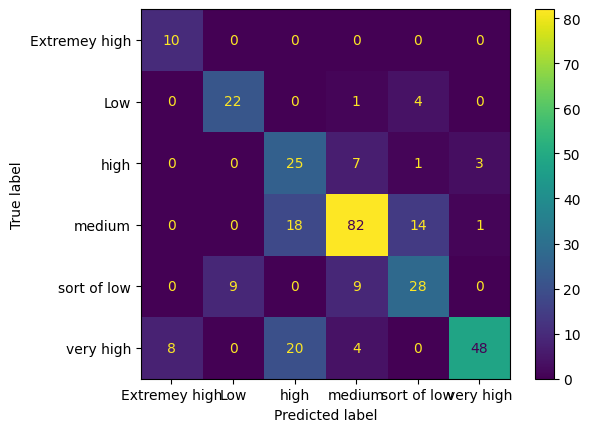

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
con_mat = confusion_matrix(y_pred, y_test, labels=model.classes_)
display = ConfusionMatrixDisplay(con_mat, display_labels = model.classes_)
display.plot()
print(f"accuray: {accuracy}")